In [1]:
import  os

folder  =  r'H:\DSE-Capstone\2023-Oct\DSE-FT-Pune-Aug23-G2\Data'
os.chdir(folder)

In [2]:
filename = 'Housing Loan comprehensive data.csv'

In [3]:
import  pandas   as   pd
import  numpy    as   np

In [4]:
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm

In [5]:
### Explore the algorithm wrapped by RFE
from numpy                       import mean
from numpy                       import std
from sklearn.datasets            import make_classification
from sklearn.model_selection     import cross_val_score
from sklearn.model_selection     import RepeatedStratifiedKFold
from sklearn.feature_selection   import RFE
from sklearn.feature_selection   import RFECV
from sklearn.linear_model        import LogisticRegression
from sklearn.linear_model        import Perceptron
from sklearn.tree                import DecisionTreeClassifier
from sklearn.ensemble            import RandomForestClassifier
from sklearn.ensemble            import GradientBoostingClassifier
from sklearn.pipeline            import Pipeline

In [6]:
def identify_outliers(df, var):
    # Interquartile Range (IQR)

    # Calculate the upper and lower limits
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.boxplot(column = [var])
    plt.show()
    return (lower, upper)

### Feature selection

We shall convert the categorical variables to numerical variables to carry out RFE techniques and model building.

In the machine learning process, feature selection is used to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones. This is why feature selection is important.

Ref: https://h2o.ai/wiki/feature-selection/#:~:text=In%20the%20machine%20learning%20process,why%20feature%20selection%20is%20important.

### Perform feature selection

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm in a dataset that are more or most relevant in predicting the target variable.

RFE applies a backward selection process to find the best combination of features. This is done as follows:

Builds a model based on all features and calculates the importance of each feature in the model.
It ranks the features and removes the feature(s) with the least importance iteratively based on model evaluation metrics such as accuracy ratio, F1 weighted.

Ref 1. https://towardsdatascience.com/effective-feature-selection-recursive-feature-elimination-using-r-148ff998e4f7

Ref 2: https://machinelearningmastery.com/rfe-feature-selection-in-python/

### Automatically select the number of features

It is also possible to automatically select the number of features chosen by RFE.

Using the RFECV class, This can be achieved by performing cross-validation evaluation of different numbers of features and
automatically selecting the number of features that resulted in the best mean score.

The RFECV is configured by specifying the minimum number of features via the “min_features_to_select” argument (defaults to 1) 
and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) 
and “scoring” arguments (uses accuracy for classification).

In [7]:
df_        =   pd.read_csv(filename, encoding = 'Latin-1')
df_clean   =   df_

In [8]:
df_clean.shape

(307511, 136)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

For the numerical columns converted from categorical variables, we shall suffix with "_code".

In [10]:
numerical_features =  df_clean.select_dtypes(include = np.number).columns.to_list()

In [11]:
numerical_features

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVING

In [12]:
categorical_features =  df_clean.select_dtypes(exclude = np.number).columns

In [13]:
categorical_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [14]:
i = 1
for each in categorical_features:
    print("\ni = %d" %i)
    i                +=  1
    newcol            =  each + "_code"
    df_clean[newcol]  =  le.fit_transform(df_clean[[each]])
    
    df_clean.drop(each, axis=1, inplace = True)
    print(df_clean[newcol].head(11))


i = 1
0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
Name: NAME_CONTRACT_TYPE_code, dtype: int32

i = 2


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     1
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     0
9     1
10    0
Name: CODE_GENDER_code, dtype: int32

i = 3
0     0
1     0
2     1
3     0
4     0
5     0
6     1
7     1
8     0
9     0
10    0
Name: FLAG_OWN_CAR_code, dtype: int32

i = 4


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: FLAG_OWN_REALTY_code, dtype: int32

i = 5
0     6
1     1
2     6
3     6
4     6
5     5
6     6
7     6
8     0
9     6
10    6
Name: NAME_TYPE_SUITE_code, dtype: int32

i = 6


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     7
1     4
2     7
3     7
4     7
5     4
6     1
7     4
8     3
9     7
10    7
Name: NAME_INCOME_TYPE_code, dtype: int32

i = 7
0     4
1     1
2     4
3     4
4     4
5     4
6     1
7     1
8     4
9     4
10    1
Name: NAME_EDUCATION_TYPE_code, dtype: int32

i = 8


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     3
1     1
2     3
3     0
4     3
5     1
6     1
7     1
8     1
9     3
10    1
Name: NAME_FAMILY_STATUS_code, dtype: int32

i = 9
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: NAME_HOUSING_TYPE_code, dtype: int32

i = 10


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0      8
1      3
2      8
3      8
4      3
5      8
6      0
7     10
8      8
9      8
10     3
Name: OCCUPATION_TYPE_code, dtype: int32

i = 11
0     6
1     1
2     1
3     6
4     4
5     6
6     3
7     1
8     6
9     4
10    2
Name: WEEKDAY_APPR_PROCESS_START_code, dtype: int32

i = 12


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0      5
1     39
2     11
3      5
4     37
5     33
6      5
7     33
8     57
9      9
10    30
Name: ORGANIZATION_TYPE_code, dtype: int32

i = 13
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: HOUSETYPE_MODE_code, dtype: int32

i = 14


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0     5
1     0
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
Name: WALLSMATERIAL_MODE_code, dtype: int32

i = 15
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: EMERGENCYSTATE_MODE_code, dtype: int32


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
df_clean.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'NAME_INCOME_TYPE_code', 'NAME_EDUCATION_TYPE_code',
       'NAME_FAMILY_STATUS_code', 'NAME_HOUSING_TYPE_code',
       'OCCUPATION_TYPE_code', 'WEEKDAY_APPR_PROCESS_START_code',
       'ORGANIZATION_TYPE_code', 'HOUSETYPE_MODE_code',
       'WALLSMATERIAL_MODE_code', 'EMERGENCYSTATE_MODE_code'],
      dtype='object', length=136)

In [16]:
df_clean.dtypes

SK_ID_CURR                           int64
TARGET                               int64
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT                         float64
                                    ...   
WEEKDAY_APPR_PROCESS_START_code      int32
ORGANIZATION_TYPE_code               int32
HOUSETYPE_MODE_code                  int32
WALLSMATERIAL_MODE_code              int32
EMERGENCYSTATE_MODE_code             int32
Length: 136, dtype: object

cat_names   = ['NAME_CONTRACT_TYPE_code', 'CODE_GENDER_code', 'FLAG_OWN_CAR_code', 'FLAG_OWN_REALTY_code',\
               'NAME_TYPE_SUITE_code', 'NAME_INCOME_TYPE_code', 'NAME_EDUCATION_TYPE_code',\
               'NAME_FAMILY_STATUS_code', 'NAME_HOUSING_TYPE_code', 'OCCUPATION_TYPE_code',\
               'WEEKDAY_APPR_PROCESS_START_code', 'ORGANIZATION_TYPE_code', 'HOUSETYPE_MODE_code',\
               'WALLSMATERIAL_MODE_code', 'EMERGENCYSTATE_MODE_code']
Xcols       =  numerical_features + cat_names
print(Xcols); print(len(Xcols))

### Remove the unwanted variable such as ID variable, SK_ID_CURR

In [17]:
Xcols =   df_clean.columns.to_list()
Xcols.remove('SK_ID_CURR')
Xcols.remove('TARGET')

In [18]:
len(Xcols)

134

In [19]:
# define dataset
y             =    df_clean['TARGET']
X             =    df_clean.loc[:, Xcols]   
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (307511, 134)
y dimension (307511,)


### Find the proportion of classes in the target variable, TARGET

In [20]:
df_clean['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [21]:
df_clean['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

### Choose the right metric for measuring the performance of the machine learning models.

Recall is important for predicting loan default because it reflects the ability of the classifier to capture the risky loans that should be avoided by the investors. A low recall means that many loans that will default are missed by the classifier and classified as fully paid, which can lead to significant losses for the investors. A high recall means that most of the loans that will default are correctly identified by the classifier and excluded from the investment portfolio, which can reduce the risk and increase the return for the investors.

However, recall is not the only metric that should be considered for predicting loan default. Recall does not take into account the false positives (FP), which are the loans that are incorrectly predicted to default but actually fully paid. A high recall can be achieved by simply predicting all loans to default, but this will also result in a high number of false positives and a low precision, which is the ratio of true positives to the sum of true positives and false positives. Precision measures how accurate the classifier is when it predicts a loan to default. A low precision means that many loans that are predicted to default are actually fully paid, which can lead to missed opportunities for the investors. A high precision means that most of the loans that are predicted to default are actually default, which can increase the confidence and efficiency of the investors.

Therefore, recall and precision are often used together to evaluate the performance of a classifier for predicting loan default. A trade-off between recall and precision can be observed, where increasing one may decrease the other. A common way to combine recall and precision into a single metric is the F1-score, which is the harmonic mean of recall and precision. The F1-score can range from 0 to 1, where a higher value indicates a better balance between recall and precision.

Weighted F1 average is a metric that can be used to evaluate the performance of a binary classifier that predicts whether a loan will default or not. It is calculated as the harmonic mean of weighted precision and weighted recall, where the weights are proportional to the number of true instances for each label1. A higher weighted F1 average means that the classifier is more accurate and balanced in predicting both classes.




### Observation

Our dataset is not balanced. So, we choose, Weighted F1 average as the metric to measure the performance of the models.

We have used the followig classifier for performing RFE:

Random Forest classifier: **Random Forest** is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [22]:
collist = X.columns

In [23]:
collist

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'NAME_INCOME_TYPE_code', 'NAME_EDUCATION_TYPE_code',
       'NAME_FAMILY_STATUS_code', 'NAME_HOUSING_TYPE_code',
       'OCCUPATION_TYPE_code', 'WEEKDAY_APPR_PROCESS_START_code',
       'ORGANIZATION_TYPE_code', 'HOUSETYPE_MODE_code',
       'WALLSMATERIAL_MODE_code', 'EMERGENCYSTATE_MODE_code'],
      dtype='object', length=134)

In [24]:
categorical_features_X =  X.select_dtypes(exclude = np.number).columns

In [25]:
categorical_features_X

Index([], dtype='object')

In [26]:
# define RFE
rfe = RFE(estimator = RandomForestClassifier(n_estimators= 10, criterion = "entropy"), n_features_to_select = 15)

# fit RFE
rfe.fit(X, y)
# summarize all features

sno_L        =    list()
support_text =    list()
rank_list    =    list()

for i in range(X.shape[1]):
    sno_L.append(i)
    support_text.append(rfe.support_[i])
    rank_list.append(rfe.ranking_[i])
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 64.000
Column: 1, Selected False, Rank: 21.000
Column: 2, Selected False, Rank: 6.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 19.000
Column: 5, Selected False, Rank: 12.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 7.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 118.000
Column: 11, Selected False, Rank: 89.000
Column: 12, Selected False, Rank: 80.000
Column: 13, Selected False, Rank: 107.000
Column: 14, Selected False, Rank: 78.000
Column: 15, Selected False, Rank: 92.000
Column: 16, Selected False, Rank: 52.000
Column: 17, Selected False, Rank: 69.000
Column: 18, Selected False, Rank: 61.000
Column: 19, Selected False, Rank: 22.000
Column: 20, Selected False, Rank: 98.000
Column: 21, Selected False, Rank: 90.000
Column: 22, Selected False, Rank: 95.000
Column: 23, Selected False, Rank: 82.000
Column: 24, Selected False, Rank: 

In [27]:
df_imp  =  pd.DataFrame({'Sno' : sno_L, 'Selected?' : support_text, 'Rank' : rank_list, 'Columns' : collist })

In [28]:
df_imp

,Sno,Selected?,Rank,Columns
0,0,False,64,CNT_CHILDREN
1,1,False,21,AMT_INCOME_TOTAL
2,2,False,6,AMT_CREDIT
3,3,True,1,AMT_ANNUITY
4,4,False,19,AMT_GOODS_PRICE
...,...,...,...,...
129,129,False,32,WEEKDAY_APPR_PROCESS_START_code
130,130,False,26,ORGANIZATION_TYPE_code
131,131,False,99,HOUSETYPE_MODE_code
132,132,False,77,WALLSMATERIAL_MODE_code


In [29]:
imp_variables_df  =  df_imp.loc[df_imp['Selected?'] == True, 'Columns']

In [30]:
imp_variables_df

3                    AMT_ANNUITY
6                     DAYS_BIRTH
8              DAYS_REGISTRATION
9                DAYS_ID_PUBLISH
27                  EXT_SOURCE_2
28                  EXT_SOURCE_3
104            PA_AMT_CREDIT_sum
109       PA_DAYS_DECISION_max_y
112       IP_DAYS_INSTALMENT_min
113        IP_AMT_INSTALMENT_sum
114        IP_AMT_INSTALMENT_avg
115     AT_CREDIT_INCOME_PERCENT
116    AT_ANNUITY_INCOME_PERCENT
117               AT_CREDIT_TERM
118     AT_DAYS_EMPLOYED_PERCENT
Name: Columns, dtype: object

In [31]:
reqd_vars = imp_variables_df.values.tolist()
print(reqd_vars)

['AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'PA_AMT_CREDIT_sum', 'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min', 'IP_AMT_INSTALMENT_sum', 'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT', 'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT']


In [32]:
# using + operator + list conversion 
target     = 'TARGET'
reqd_vars += [target] 

In [33]:
df_clean =  df_.loc[:, reqd_vars]

In [34]:
df_clean.shape

(307511, 16)

### Observation

The dataset after feature elimination of least important variables contains 307511 rows and 16 columns.

### Detect outliers and treat them
We need to find numerical variables and check if there are any outliers.

In [35]:
num_vars =  df_clean.select_dtypes(include=np.number).columns

In [36]:
num_vars

Index(['AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'PA_AMT_CREDIT_sum',
       'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min',
       'IP_AMT_INSTALMENT_sum', 'IP_AMT_INSTALMENT_avg',
       'AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT',
       'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT', 'TARGET'],
      dtype='object')

In [41]:
independent_numvars = ['AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','EXT_SOURCE_2', 'EXT_SOURCE_3',\
                       'PA_AMT_CREDIT_sum','PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min','IP_AMT_INSTALMENT_sum',\
                       'IP_AMT_INSTALMENT_avg','AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT','AT_CREDIT_TERM',\
                       'AT_DAYS_EMPLOYED_PERCENT']

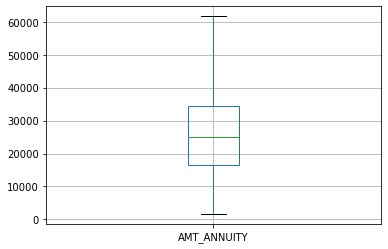

Statistics for AMT_ANNUITY
count    307511.000000
mean      26797.657150
std       13281.285661
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       61704.000000
Name: AMT_ANNUITY, dtype: float64


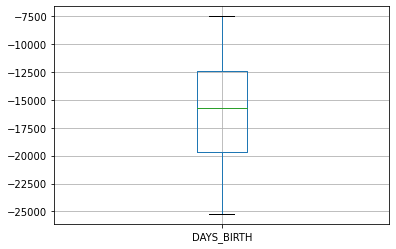

Statistics for DAYS_BIRTH
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


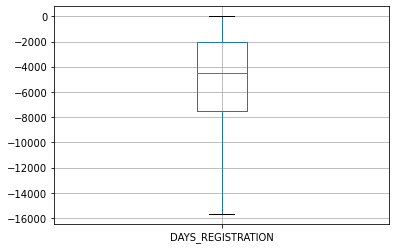

Statistics for DAYS_REGISTRATION
count    307511.000000
mean      -4983.512526
std        3513.934117
min      -15683.750000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


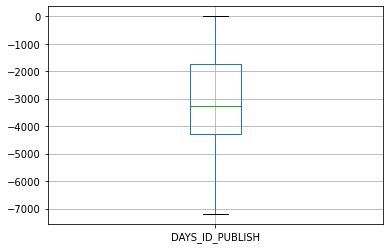

Statistics for DAYS_ID_PUBLISH
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


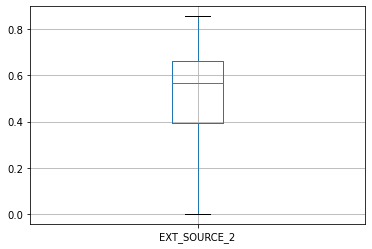

Statistics for EXT_SOURCE_2
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


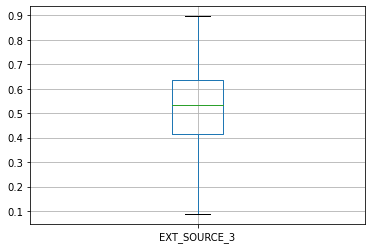

Statistics for EXT_SOURCE_3
count    307511.000000
mean          0.516216
std           0.173364
min           0.088185
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


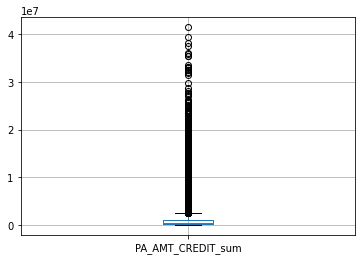

Statistics for PA_AMT_CREDIT_sum
count    3.075110e+05
mean     9.026859e+05
std      1.462142e+06
min      0.000000e+00
25%      1.309185e+05
50%      3.837780e+05
75%      1.090627e+06
max      4.146113e+07
Name: PA_AMT_CREDIT_sum, dtype: float64


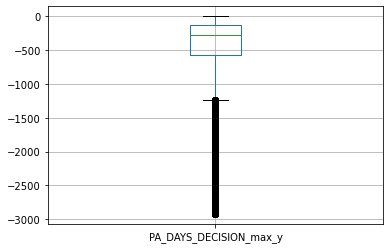

Statistics for PA_DAYS_DECISION_max_y
count    307511.000000
mean       -455.089740
std         536.559151
min       -2922.000000
25%        -569.000000
50%        -279.000000
75%        -123.000000
max           0.000000
Name: PA_DAYS_DECISION_max_y, dtype: float64


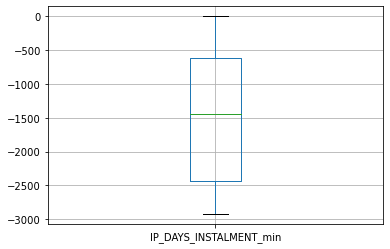

Statistics for IP_DAYS_INSTALMENT_min
count    307511.000000
mean      -1503.163536
std         956.409762
min       -2922.000000
25%       -2436.000000
50%       -1450.000000
75%        -621.000000
max           0.000000
Name: IP_DAYS_INSTALMENT_min, dtype: float64


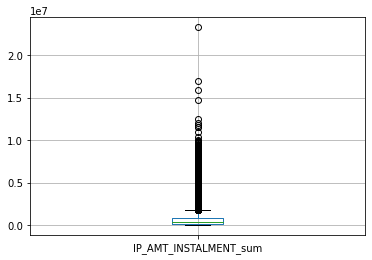

Statistics for IP_AMT_INSTALMENT_sum
count    3.075110e+05
mean     6.377183e+05
std      8.698961e+05
min      0.000000e+00
25%      1.147045e+05
50%      2.980917e+05
75%      7.964169e+05
max      2.327473e+07
Name: IP_AMT_INSTALMENT_sum, dtype: float64


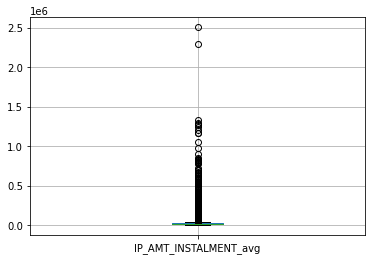

Statistics for IP_AMT_INSTALMENT_avg
count    3.075110e+05
mean     1.744353e+04
std      2.308920e+04
min      0.000000e+00
25%      7.100846e+03
50%      1.195442e+04
75%      2.059924e+04
max      2.504590e+06
Name: IP_AMT_INSTALMENT_avg, dtype: float64


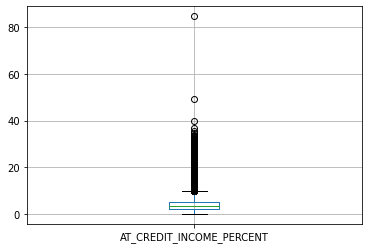

Statistics for AT_CREDIT_INCOME_PERCENT
count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: AT_CREDIT_INCOME_PERCENT, dtype: float64


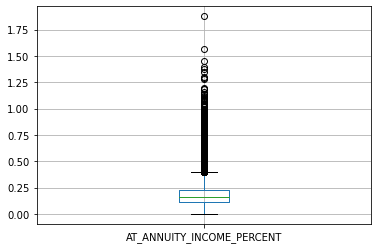

Statistics for AT_ANNUITY_INCOME_PERCENT
count    307511.000000
mean          0.180929
std           0.094573
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: AT_ANNUITY_INCOME_PERCENT, dtype: float64


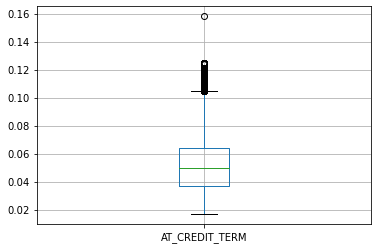

Statistics for AT_CREDIT_TERM
count    307511.000000
mean          0.053695
std           0.022482
min           0.016790
25%           0.036900
50%           0.050000
75%           0.064043
max           0.158114
Name: AT_CREDIT_TERM, dtype: float64


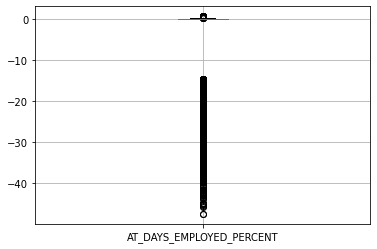

Statistics for AT_DAYS_EMPLOYED_PERCENT
count    307511.000000
mean         -2.920135
std           6.627098
min         -47.489663
25%           0.021559
50%           0.088645
75%           0.191000
max           0.728811
Name: AT_DAYS_EMPLOYED_PERCENT, dtype: float64


In [42]:
for var in independent_numvars:
    lower_bound, upper_bound = identify_outliers(df_clean, var)
    print("Statistics for %s" % var)
    print(df_clean[var].describe())

### Observation

#### There are No outliers in the following 7 variables as revealed by the boxplots:
* 1. AMT_ANNUITY
* 2. DAYS_BIRTH
* 3. DAYS_REGISTRATION 
* 4. DAYS_ID_PUBLISH
* 5. EXT_SOURCE_2
* 6. EXT_SOURCE_3
* 7. IP_DAYS_INSTALMENT_min
 

#### There are outliers in the following 11 variables as revealed by the boxplots:
*  1. PA_AMT_CREDIT_sum
*  2. PA_DAYS_DECISION_max_y
*  3. IP_AMT_INSTALMENT_sum
*  4. IP_AMT_INSTALMENT_avg
*  5. AT_CREDIT_INCOME_PERCENT
*  6. AT_ANNUITY_INCOME_PERCENT
*  7. AT_CREDIT_TERM
*  8. AT_DAYS_EMPLOYED_PERCENT

### Treatment of outliers

We can treat outliers either by winsorization or scaling.

### Winsorization

Winsorization replaces extreme values with a specified percentile value. For example, you can replace values above the 95th percentile with the value at the 95th percentile and values below the 5th percentile with the value at the 5th percentile.
When can you apply the winsorization to treat outliers?
Below are cases when you can use the winsorization technique to treat outliers:

### when do you use winsorization technique?

When you want to keep the data distribution intact: Winsorization can be useful when you want to address outliers but still maintain the original data distribution to some extent.

When you have some tolerance for outliers: Winsorization allows you to set a threshold for how extreme values should be replaced, making it a flexible approach.

We will use winsorization technique using IQR method.

In [39]:
def cap_outliers(df, VAR):
    p25  =  df[VAR].quantile(0.25)
    p75  =  df[VAR].quantile(0.75)
    IQR  =  p75 - p25
    ulim =  p75 + (1.5 * IQR)
    llim =  p25 - (1.5 * IQR)
    df[VAR] = df[VAR].clip(lower = llim, upper = ulim)
    return df[VAR]
  

### Capping for the 11 variables affected by outliers:
*  1. PA_AMT_CREDIT_sum
*  2. PA_DAYS_DECISION_max_y
*  3. IP_AMT_INSTALMENT_sum
*  4. IP_AMT_INSTALMENT_avg
*  5. AT_CREDIT_INCOME_PERCENT
*  6. AT_ANNUITY_INCOME_PERCENT
*  7. AT_CREDIT_TERM
*  8. AT_DAYS_EMPLOYED_PERCENT

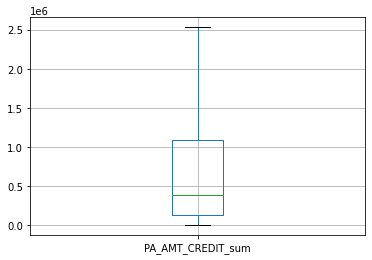

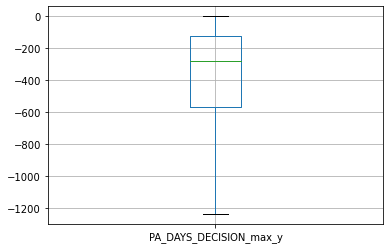

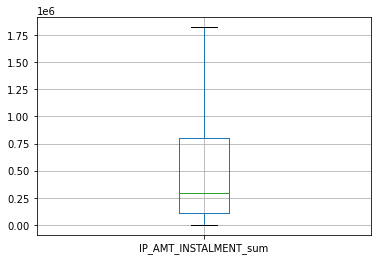

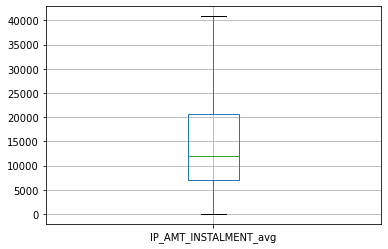

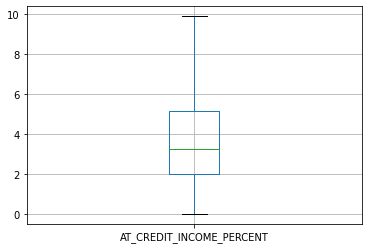

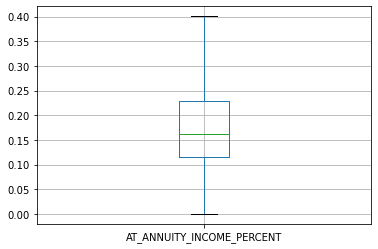

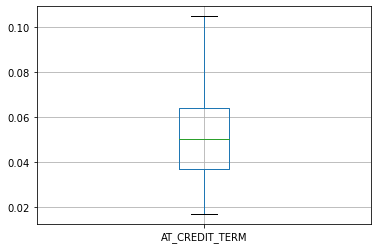

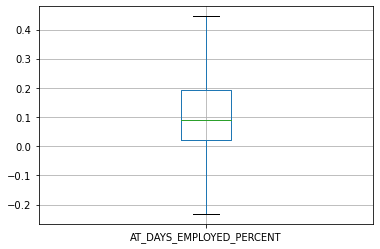

In [43]:
cap_vars = ['PA_AMT_CREDIT_sum','PA_DAYS_DECISION_max_y','IP_AMT_INSTALMENT_sum','IP_AMT_INSTALMENT_avg',\
            'AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT', 'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT']


for each in cap_vars:
    VAR            =  each
    df_clean[VAR] = cap_outliers(df_clean, VAR)
    df_clean.boxplot(column = [VAR])
    plt.show()

### Observation

We have removed the outliers successfully as revealed in the above boxplots.
Now, we can use the data for EDA.

In [44]:
df_clean.shape

(307511, 16)

### Export data for EDA

In [45]:
df_clean.to_csv('Cleaned_housing_loan_data.csv', index = False)